# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will work on the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

students = pd.read_csv('StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Genders

In [31]:
genders = students["gender"].unique()
grup_students = students.groupby("gender")

In [32]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            ttest = stats.ttest_ind(students[students["gender"]==genders[i]][var], 
                                students[students["gender"]==genders[j]][var])
            group_1 = genders[i]
            group_2 = genders[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,female,male,-5.383245869828983,0.000000091201855


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,female,male,7.959308005187657,0.000000000000005


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,female,male,9.979557910004507,0.000000000000000


By t-test, one can see that the gender diversity **affects** the mean of the exam results.

In [33]:
students.groupby(['gender']).mean()

,math score,reading score,writing score
gender,,,
female,63.633204633204635,72.608108108108112,72.467181467181462
male,68.728215767634850,65.473029045643159,63.311203319502077


# Origins

In [34]:
origins = students["race/ethnicity"].unique()
grup_students = students.groupby("race/ethnicity")

In [36]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(origins)):
        for j in range(i+1, len(origins)):
            ttest = stats.ttest_ind(students[students["race/ethnicity"]==origins[i]][var], 
                                students[students["race/ethnicity"]==origins[j]][var])
            group_1 = origins[i]
            group_2 = origins[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226




*   In the scores of math exams, (group B and group C) & (group C and group A) & (group B and group A) does **not** differ that much, whereas the others **does** change.
*   In general, one can see the differences by checking whether t-statistics value is greater than or equal to +-1.96 in the upper tables.



In [37]:
#this is to see the real mean values of different ethnicities.
students.groupby(['race/ethnicity']).mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213483146067,64.674157303370791,62.674157303370784
group B,63.452631578947368,67.352631578947367,65.599999999999994
group C,64.463949843260181,69.103448275862064,67.827586206896555
group D,67.362595419847324,70.030534351145036,70.145038167938935
group E,73.821428571428569,73.028571428571425,71.407142857142858


# Parental lvl of Ed.

In [38]:
parents = students["parental level of education"].unique()
grup_students = students.groupby("parental level of education")

In [39]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            ttest = stats.ttest_ind(students[students["parental level of education"]==parents[i]][var], 
                                students[students["parental level of education"]==parents[j]][var])
            group_1 = parents[i]
            group_2 = parents[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,1.370235282961748,0.171512242184716
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.878664188979324,0.380207578180362
3,bachelor's degree,high school,4.236143622484822,0.000029965345854
4,bachelor's degree,some high school,3.196718602676573,0.001540919292281
5,some college,master's degree,-1.235633421582457,0.217619568103474
6,some college,associate's degree,-0.542684269624753,0.587618280923407
7,some college,high school,3.546107949568116,0.000434980041925
8,some college,some high school,2.411704623140763,0.016324361572646
9,master's degree,associate's degree,0.841122968856347,0.400999363612466


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.204882120908508,0.028127555314401
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017577900835298,0.000000880425031
4,bachelor's degree,some high school,3.403927067379874,0.000756197171973
5,some college,master's degree,-2.888843374950649,0.004165440800640
6,some college,associate's degree,-1.112318821691490,0.266600285399801
7,some college,high school,3.457842768362033,0.000600104848125
8,some college,some high school,1.714161972758909,0.087267868562439
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.680331468463220,0.007711012023673
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.547380937127048,0.000000000240763
4,bachelor's degree,some high school,4.667733097498242,0.000004628198527
5,some college,master's degree,-3.168769063239491,0.001698593313596
6,some college,associate's degree,-0.761596864395391,0.446703166030366
7,some college,high school,4.488520877492127,0.000009275017803
8,some college,some high school,2.575721140379242,0.010358529086081
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


Again, it varies for diverse categories.

*   For example, there is a greater correlation of the results of bachelor's degree and master's degree.


In [40]:
students.groupby(['parental level of education']).mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882882882882882,70.927927927927925,69.896396396396398
bachelor's degree,69.389830508474574,73.000000000000000,73.381355932203391
high school,62.137755102040813,64.704081632653057,62.448979591836732
master's degree,69.745762711864401,75.372881355932208,75.677966101694921
some college,67.128318584070797,69.460176991150448,68.840707964601776
some high school,63.497206703910614,66.938547486033514,64.888268156424587


# Charts

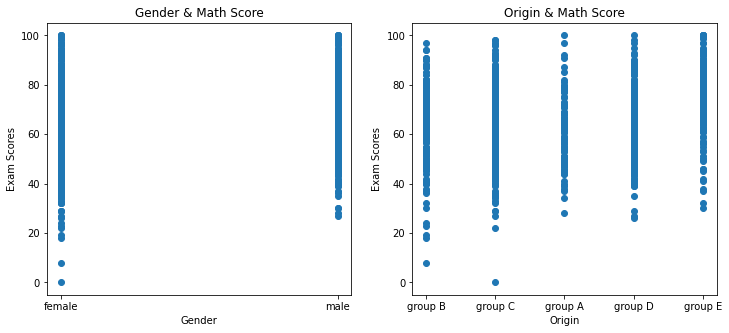

In [41]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(students['gender'], students['math score'])
plt.title('Gender & Math Score')
plt.xlabel('Gender')
plt.ylabel('Exam Scores')

plt.subplot(122)
plt.scatter(students['race/ethnicity'], students['math score'])
plt.title('Origin & Math Score')
plt.xlabel('Origin')
plt.ylabel('Exam Scores')
plt.show()

Text(0, 0.5, 'Exam Scores')

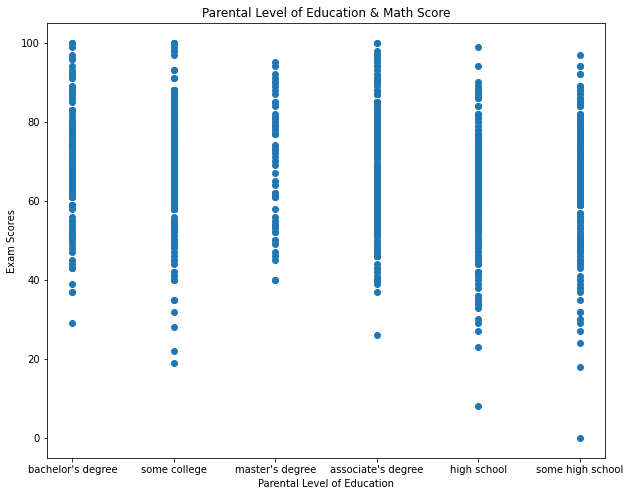

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(students['parental level of education'], students['math score'])
plt.title('Parental Level of Education & Math Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Exam Scores')


**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [43]:
lunchs = students["lunch"].unique()
grup_students = students.groupby("lunch")

In [44]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(lunchs)):
        for j in range(i+1, len(lunchs)):
            ttest = stats.ttest_ind(students[students["lunch"]==lunchs[i]][var], 
                                students[students["lunch"]==lunchs[j]][var])
            group_1 = lunchs[i]
            group_2 = lunchs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.837180472914612,0.000000000000000


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.451056467473455,0.000000000000200


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.009784197834758,0.000000000000003


Our t-statistics values are so high, that means we have to reject the null hypothesis. Thus, lunch type affects the exam results, unfortunately.

In [45]:
students.groupby(['lunch']).mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921126760563382,64.653521126760566,63.022535211267609
standard,70.034108527131778,71.654263565891469,70.823255813953494


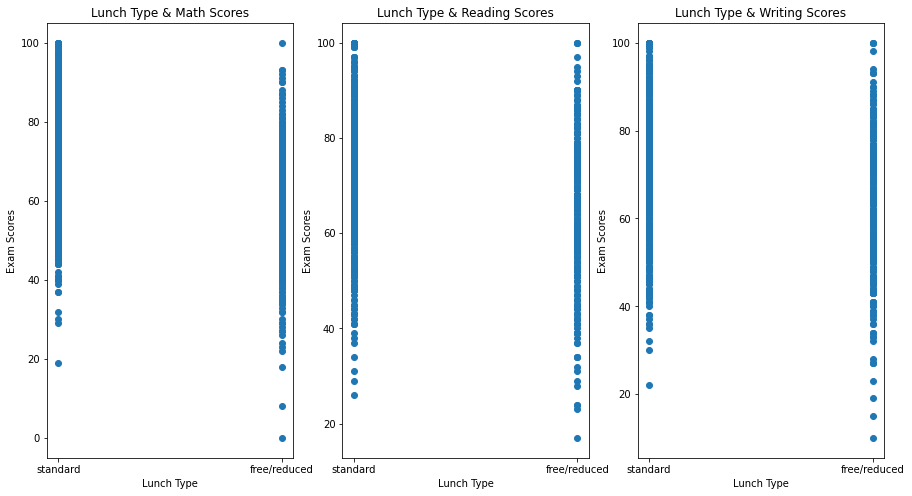

In [46]:
plt.figure(figsize=(15,8))

plt.subplot(131)
plt.scatter(students['lunch'], students['math score'])
plt.title('Lunch Type & Math Scores')
plt.xlabel('Lunch Type')
plt.ylabel('Exam Scores')

plt.subplot(132)
plt.scatter(students['lunch'], students['reading score'])
plt.title('Lunch Type & Reading Scores')
plt.xlabel('Lunch Type')
plt.ylabel('Exam Scores')

plt.subplot(133)
plt.scatter(students['lunch'], students['writing score'])
plt.title('Lunch Type & Writing Scores')
plt.xlabel('Lunch Type')
plt.ylabel('Exam Scores')
plt.show()

**(3)** Does the preparation courses have an impact on exam performance?

In [47]:
courses = students["test preparation course"].unique()
grup_students = students.groupby("test preparation course")

In [48]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(courses)):
        for j in range(i+1, len(courses)):
            ttest = stats.ttest_ind(students[students["test preparation course"]==courses[i]][var], 
                                students[students["test preparation course"]==courses[j]][var])
            group_1 = courses[i]
            group_2 = courses[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,none,completed,-5.704616417349102,0.000000015359135


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,none,completed,-7.871663538941468,0.000000000000009


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,none,completed,-10.409173436808748,0.000000000000000


Again, the test prep courses affects the exam results higher than we expected.

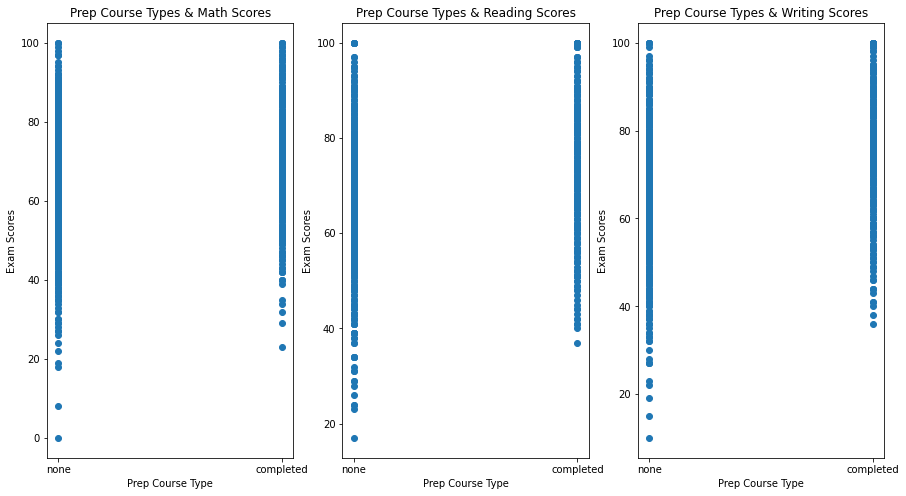

In [49]:
plt.figure(figsize=(15,8))

plt.subplot(131)
plt.scatter(students['test preparation course'], students['math score'])
plt.title('Prep Course Types & Math Scores')
plt.xlabel('Prep Course Type')
plt.ylabel('Exam Scores')

plt.subplot(132)
plt.scatter(students['test preparation course'], students['reading score'])
plt.title('Prep Course Types & Reading Scores')
plt.xlabel('Prep Course Type')
plt.ylabel('Exam Scores')

plt.subplot(133)
plt.scatter(students['test preparation course'], students['writing score'])
plt.title('Prep Course Types & Writing Scores')
plt.xlabel('Prep Course Type')
plt.ylabel('Exam Scores')
plt.show()

#Yes, it affects the exam results.

**(4)** Which lessons are most correlated with each other?

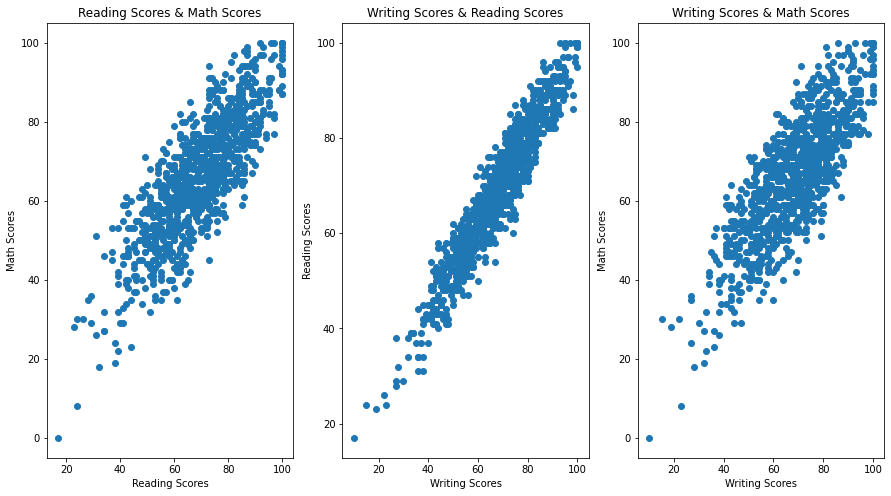

In [50]:
plt.figure(figsize=(15,8))

plt.subplot(131)
plt.scatter(students['reading score'], students['math score'])
plt.title('Reading Scores & Math Scores')
plt.xlabel('Reading Scores')
plt.ylabel('Math Scores')

plt.subplot(132)
plt.scatter(students['writing score'], students['reading score'])
plt.title('Writing Scores & Reading Scores')
plt.xlabel('Writing Scores')
plt.ylabel('Reading Scores')

plt.subplot(133)
plt.scatter(students['writing score'], students['math score'])
plt.title('Writing Scores & Math Scores')
plt.xlabel('Writing Scores')
plt.ylabel('Math Scores')
plt.show()

In [51]:
students.corr()

,math score,reading score,writing score
math score,1.000000000000000,0.817579663672053,0.802642045949807
reading score,0.817579663672053,1.000000000000000,0.954598077146248
writing score,0.802642045949807,0.954598077146248,1.000000000000000


# Writing & Reading Scores are much more collerated than the other options.